# Predicting-F1-Champion-2025

| Column                   | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `Season`                 | The year of the Formula 1 season (e.g., 2018).                              |
| `Round`                  | The race number in the season (e.g., 1st round of the season).              |
| `Circuit`                | Full name of the race track or circuit where the race took place.           |
| `Race Name`              | Official name of the race (e.g., “Australian Grand Prix”).                  |
| `Date`                   | The date when the race occurred.                                            |
| `Time_of_race`           | Starting time of the race (in UTC or Zulu time format).                     |
| `Location`               | City where the race was held.                                               |
| `Country`                | Country where the circuit is located.                                       |
| `Driver`                 | Full name of the driver who participated in the race.                       |
| `Constructor`            | The F1 team or manufacturer (e.g., Ferrari, Mercedes).                      |
| `Abbreviation`           | Driver's short 3-letter code (e.g., VET = Vettel).                          |
| `Laps`                   | Total number of laps the driver completed during the race.                  |
| `Position`               | Final race position (1 means the winner).                                   |
| `Lap Time Variation`     | Variability in the lap times (lower is more consistent).                    |
| `Position Changes`       | Number of positions gained or lost during the race.                         |
| `Fast Lap Attempts`      | How many times the driver attempted fastest laps.                           |
| `TotalPitStops`          | Number of times the driver pitted (alternate spelling: Total Pit Stops).    |
| `AvgPitStopTime`         | Average time taken for each pit stop (in seconds).                          |
| `Stint`                  | The stint number (run between two pit stops).                              |
| `Stint Length`           | Number of laps in the current stint.                                        |
| `Tire Compound`          | Type of tire used (e.g., SOFT, ULTRASOFT, MEDIUM).                          |
| `Pit_Lap`                | Lap on which the pit stop occurred.                                         |
| `Pit_Time`               | Duration of that specific pit stop (in seconds).                            |
| `Air_Temp_C`             | Air temperature in Celsius.                                                 |
| `Track_Temp_C`           | Track surface temperature in Celsius.                                       |
| `Humidity_%`             | Humidity level in percentage.                                               |
| `Wind_Speed_KMH`         | Wind speed in kilometers per hour.                                          |
| `Tire Usage Aggression`  | How aggressively the driver used their tires (higher = more wear).          |
| `Driver Aggression Score`| A metric indicating overall driving aggression.                             |


-------

## Import Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## Load Dataset

In [140]:
df = pd.read_csv('../Predicting-F1-Champion-2025/f1_pitstops_2018_2024.csv')
df.head()

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,Date,Time_of_race,Location,Country,Air_Temp_C,Track_Temp_C,Humidity_%,Wind_Speed_KMH,Lap Time Variation,Total Pit Stops,Tire Usage Aggression,Fast Lap Attempts,Position Changes,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,25-03-2018,05:10:00Z,Melbourne,Australia,15.783333,22.283333,57.0,23.8,0.001723,0.142857,0.017241,44.76882,0.000000,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,25-03-2018,05:10:00Z,Melbourne,Australia,15.783333,22.283333,57.0,23.8,0.001723,0.142857,0.017241,44.76882,0.000000,6.755003,VET,2.0,SOFT,32.0,NaN,Final Stint
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,25-03-2018,05:10:00Z,Melbourne,Australia,15.783333,22.283333,57.0,23.8,0.001735,0.142857,0.017241,44.73482,0.043478,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,25-03-2018,05:10:00Z,Melbourne,Australia,15.783333,22.283333,57.0,23.8,0.001735,0.142857,0.017241,44.73482,0.043478,6.754254,HAM,2.0,SOFT,39.0,NaN,Final Stint
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,25-03-2018,05:10:00Z,Melbourne,Australia,15.783333,22.283333,57.0,23.8,0.001603,0.142857,0.017241,45.13482,0.086957,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421


----------

## Data Preprocessing

### Data Summary

In [141]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   7374 non-null   int64  
 1   Round                    7374 non-null   int64  
 2   Circuit                  7374 non-null   object 
 3   Driver                   7374 non-null   object 
 4   Constructor              7374 non-null   object 
 5   Laps                     7374 non-null   int64  
 6   Position                 7374 non-null   int64  
 7   TotalPitStops            7374 non-null   int64  
 8   AvgPitStopTime           7189 non-null   float64
 9   Race Name                7001 non-null   object 
 10  Date                     7001 non-null   object 
 11  Time_of_race             7001 non-null   object 
 12  Location                 7001 non-null   object 
 13  Country                  7001 non-null   object 
 14  Air_Temp_C              

,count,mean,std,min,25%,50%,75%,max
Season,7374.0,2021.308245,1.969604,2018.000000,2020.000000,2021.000000,2023.000000,2024.000000
Round,7374.0,10.673312,6.135126,1.000000,5.000000,11.000000,15.000000,24.000000
Laps,7374.0,56.643748,13.922667,0.000000,52.000000,57.000000,66.000000,87.000000
Position,7374.0,10.156089,5.590062,1.000000,5.000000,10.000000,15.000000,20.000000
TotalPitStops,7374.0,2.068348,1.135088,0.000000,1.000000,2.000000,3.000000,7.000000
AvgPitStopTime,7189.0,120.109095,268.723688,17.358500,22.388000,24.414000,30.068000,3055.732000
Air_Temp_C,7001.0,19.520345,5.092982,0.387500,15.958333,19.633333,23.750000,33.295833
Track_Temp_C,7001.0,25.207104,5.195562,5.887500,21.587500,25.175000,29.504167,39.795833
Humidity_%,7001.0,67.576191,14.157319,18.375000,60.500000,70.500000,77.291667,94.333333
Wind_Speed_KMH,7001.0,11.434032,6.073363,3.362500,6.804167,9.408333,15.550000,35.908333


- Convert date column type into datetime

In [142]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Pit_Lap                    38.106862
Track_Temp_C                5.058313
Date                        5.058313
Wind_Speed_KMH              5.058313
Humidity_%                  5.058313
Air_Temp_C                  5.058313
Country                     5.058313
Location                    5.058313
Time_of_race                5.058313
Race Name                   5.058313
Pit_Time                    3.810686
AvgPitStopTime              2.508815
Lap Time Variation          2.508815
Driver Aggression Score     2.508815
Fast Lap Attempts           2.508815
Stint Length                1.478167
Tire Compound               1.478167
Stint                       1.478167
Tire Usage Aggression       0.895037
Total Pit Stops             0.000000
TotalPitStops               0.000000
Driver                      0.000000
Position Changes            0.000000
Constructor                 0.000000
Abbreviation                0.000000
Round                       0.000000
Laps                        0.000000
P

Also we have some missing values in the dataset

In [143]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in num_cols:
    print(f'No of unique values {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print(f'{df[i].unique()}')
    print('===============================================')

No of unique values Season: 7
Season
2023    1265
2024    1252
2022    1146
2021    1089
2019     941
2020     883
2018     798
Name: count, dtype: int64
[2018 2019 2020 2021 2022 2023 2024]
No of unique values Round: 24
Round
11    442
3     427
13    419
9     410
15    406
1     403
6     394
10    370
4     351
17    347
2     346
5     337
14    336
16    333
7     321
8     320
12    271
19    256
18    246
22    216
21    161
20    134
23     80
24     48
Name: count, dtype: int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 20 22 23 24]
No of unique values Laps: 78
Laps
57    616
70    576
52    573
56    542
53    487
     ... 
34      4
75      4
21      4
10      3
19      3
Name: count, Length: 78, dtype: int64
[58 57 24 22 13  5  4 56 35  3  1 51 48 42 39 10  0 66 65 64 63 45 38 25
 78 77 76 70 52 68 67 40 53 50 27 71 69 62 54 11 46 37 31 18 49 44 43 28
  8 23  9 61 60 59 55  2  6 29 16 41 33 34 26 14  7 20 17 15 30 12 47 87
 32 75 36 72 19 21]
No of unique

- We have data from 2018 to 2024
- Total 24 rounds
- 78 laps
- 20 positions
- 8 pitstops
- 8 stints
- 71 pit laps

In [144]:
cat_cols = df.select_dtypes(include=['object']).columns

for i in cat_cols:
    print(f'No of unique values {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print(f'{df[i].unique()}')
    print('===============================================')

No of unique values Circuit: 31
Circuit
Bahrain International Circuit            507
Red Bull Ring                            468
Silverstone Circuit                      432
Circuit de Barcelona-Catalunya           402
Hungaroring                              396
Autodromo Nazionale di Monza             321
Circuit of the Americas                  308
Circuit de Spa-Francorchamps             307
Circuit Park Zandvoort                   306
Baku City Circuit                        300
Suzuka Circuit                           288
Yas Marina Circuit                       285
Circuit de Monaco                        275
Albert Park Grand Prix Circuit           257
Circuit Gilles Villeneuve                242
AutÃƒÂ³dromo Hermanos RodrÃƒÂ­guez       234
Autodromo Enzo e Dino Ferrari            218
Marina Bay Street Circuit                217
Losail International Circuit             204
Jeddah Corniche Circuit                  189
Sochi Autodrom                           182
Circuit Paul Ri

- Total 31 Circuits
- 40 Drivers
- 16 Contructors
- 27 Locations
- 24 Countries 

----------

### Data Errors Handling

- Convert the Date columns into datetime format
- Convert the Time of race column into time format

In [145]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.date


df['Time_of_race'] = pd.to_datetime(df['Time_of_race'], errors='coerce')
df['Time_of_race'] = df['Time_of_race'].dt.time

We have in Pit time column has some error values `Final Stint` so we remove and fill with random value.

In [146]:
valid_pit_times = pd.to_numeric(df['Pit_Time'], errors='coerce')
valid_values = valid_pit_times.dropna().values  

mask = df['Pit_Time'] == 'Final Stint'
num_final_stints = mask.sum()

random_pit_times = np.random.choice(valid_values, size=num_final_stints, replace=True)
df.loc[mask, 'Pit_Time'] = random_pit_times

df['Pit_Time'] = pd.to_numeric(df['Pit_Time'])

--------

In [147]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Pit_Lap                    38.106862
Track_Temp_C                5.058313
Date                        5.058313
Wind_Speed_KMH              5.058313
Humidity_%                  5.058313
Air_Temp_C                  5.058313
Country                     5.058313
Location                    5.058313
Time_of_race                5.058313
Race Name                   5.058313
Pit_Time                    3.810686
AvgPitStopTime              2.508815
Lap Time Variation          2.508815
Driver Aggression Score     2.508815
Fast Lap Attempts           2.508815
Stint Length                1.478167
Tire Compound               1.478167
Stint                       1.478167
Tire Usage Aggression       0.895037
Total Pit Stops             0.000000
TotalPitStops               0.000000
Driver                      0.000000
Position Changes            0.000000
Constructor                 0.000000
Abbreviation                0.000000
Round                       0.000000
Laps                        0.000000
P

### Handling Missing Values

<Axes: >

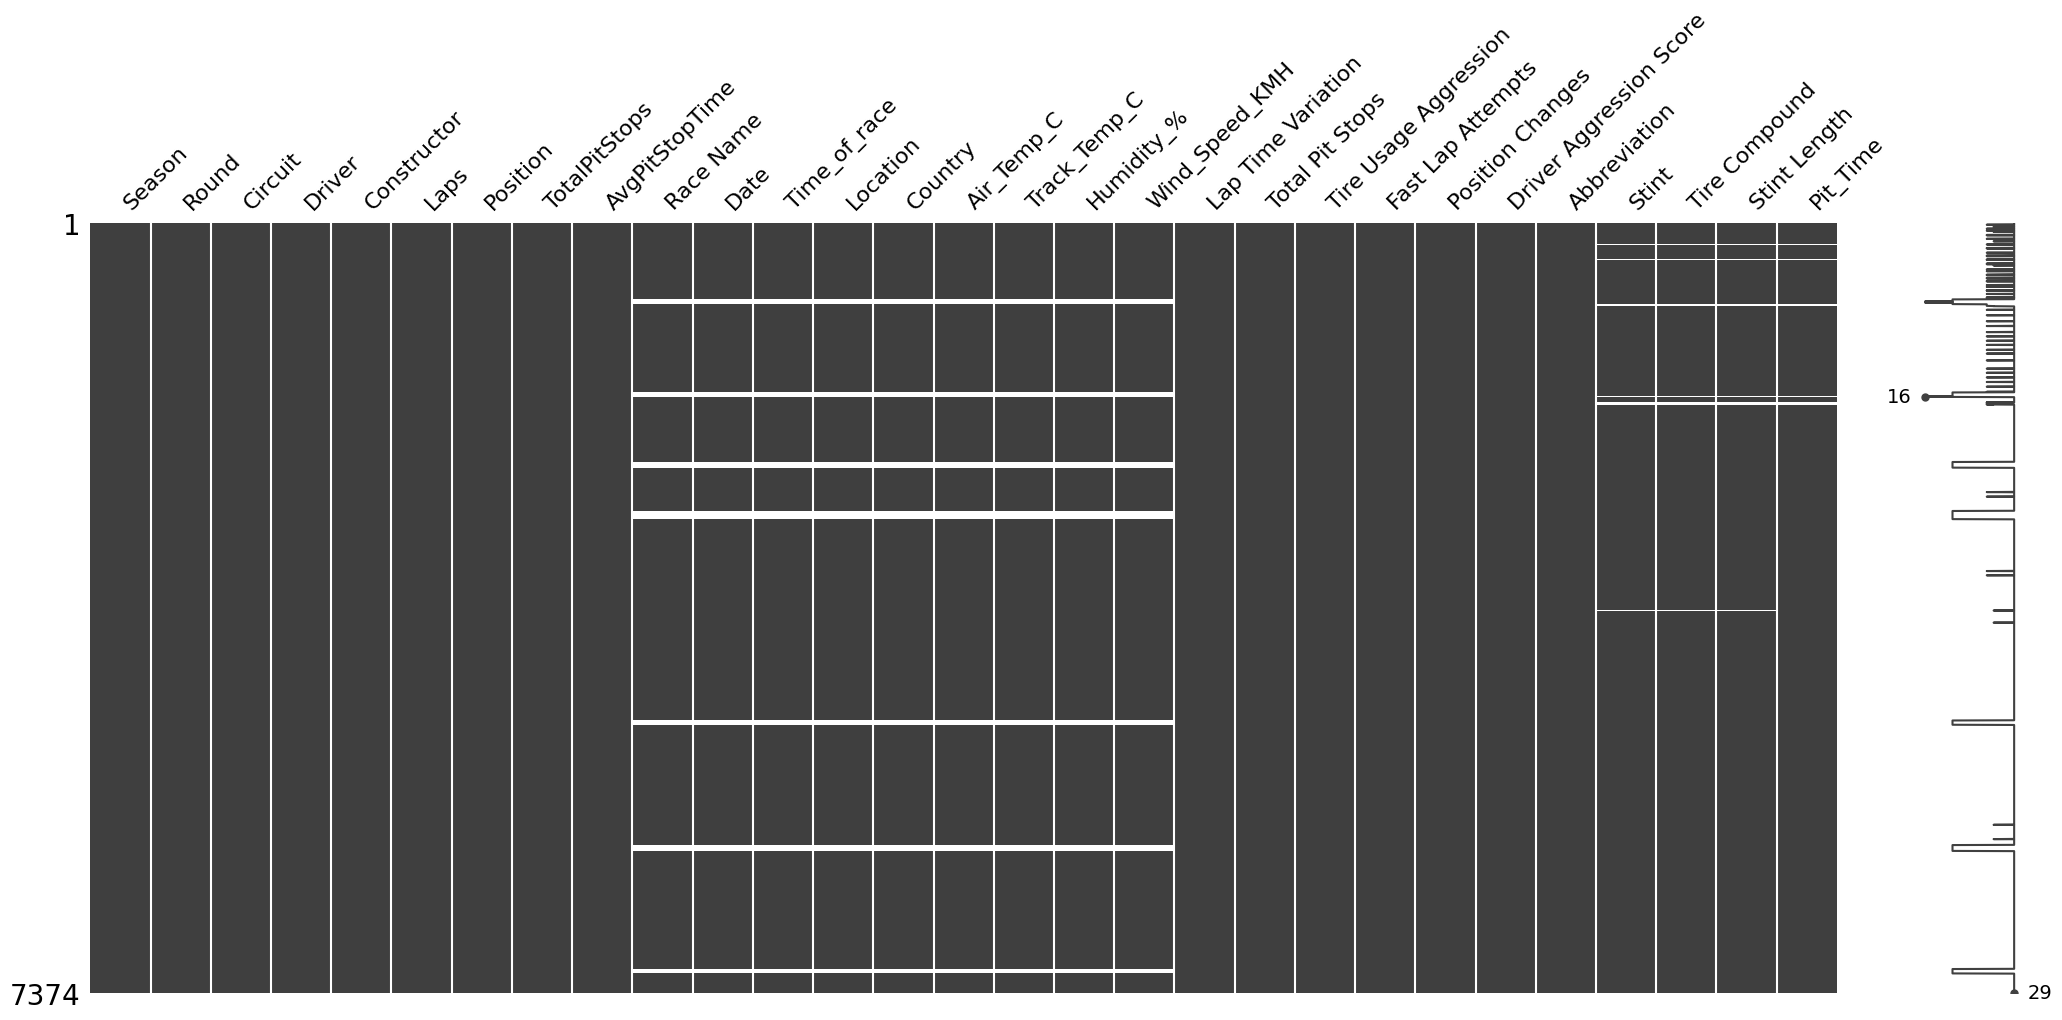

In [166]:
import missingno as msn
msn.matrix(df)

We remove the Pit Lap from the data bcz it has to much missing values and if we fill it it can generate some biasnes

In [149]:
df.drop(columns=['Pit_Lap'],inplace=True)

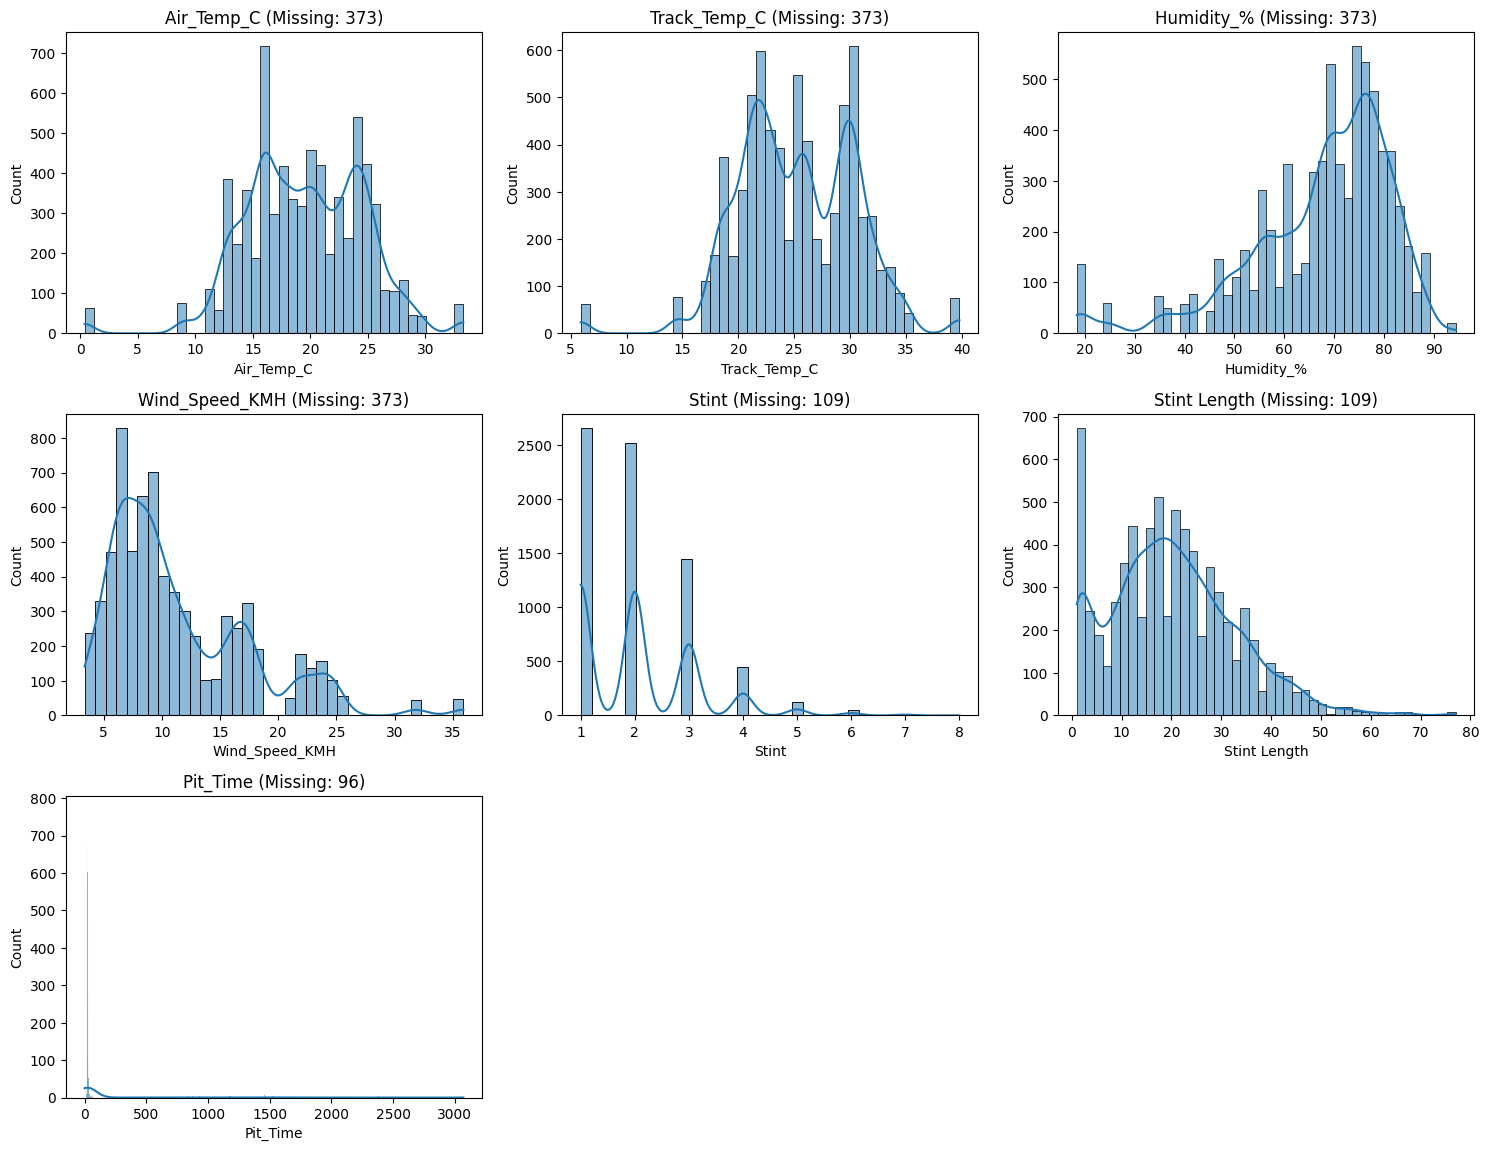

In [135]:
num_cols = df.select_dtypes(include=['number'])

missing_cols = [col for col in num_cols.columns if df[col].isnull().any()]

plt.figure(figsize=(15, 15))
for i, col in enumerate(missing_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} (Missing: {df[col].isnull().sum()})")
plt.tight_layout()
plt.show()
    

Write a condition where the PitStops == 0, then the 'AvgPitStopTime','Lap Time Variation','Total Pit Stops','Tire Usage Aggression','Fast Lap Attempts','Driver Aggression Score', 'Pit_Time' becomes zero.

In [151]:
condition = df['TotalPitStops'] == 0

cols_to_fill = ['AvgPitStopTime','Lap Time Variation','Total Pit Stops','Tire Usage Aggression','Fast Lap Attempts','Driver Aggression Score', 'Pit_Time']

df.loc[condition, cols_to_fill] = 0

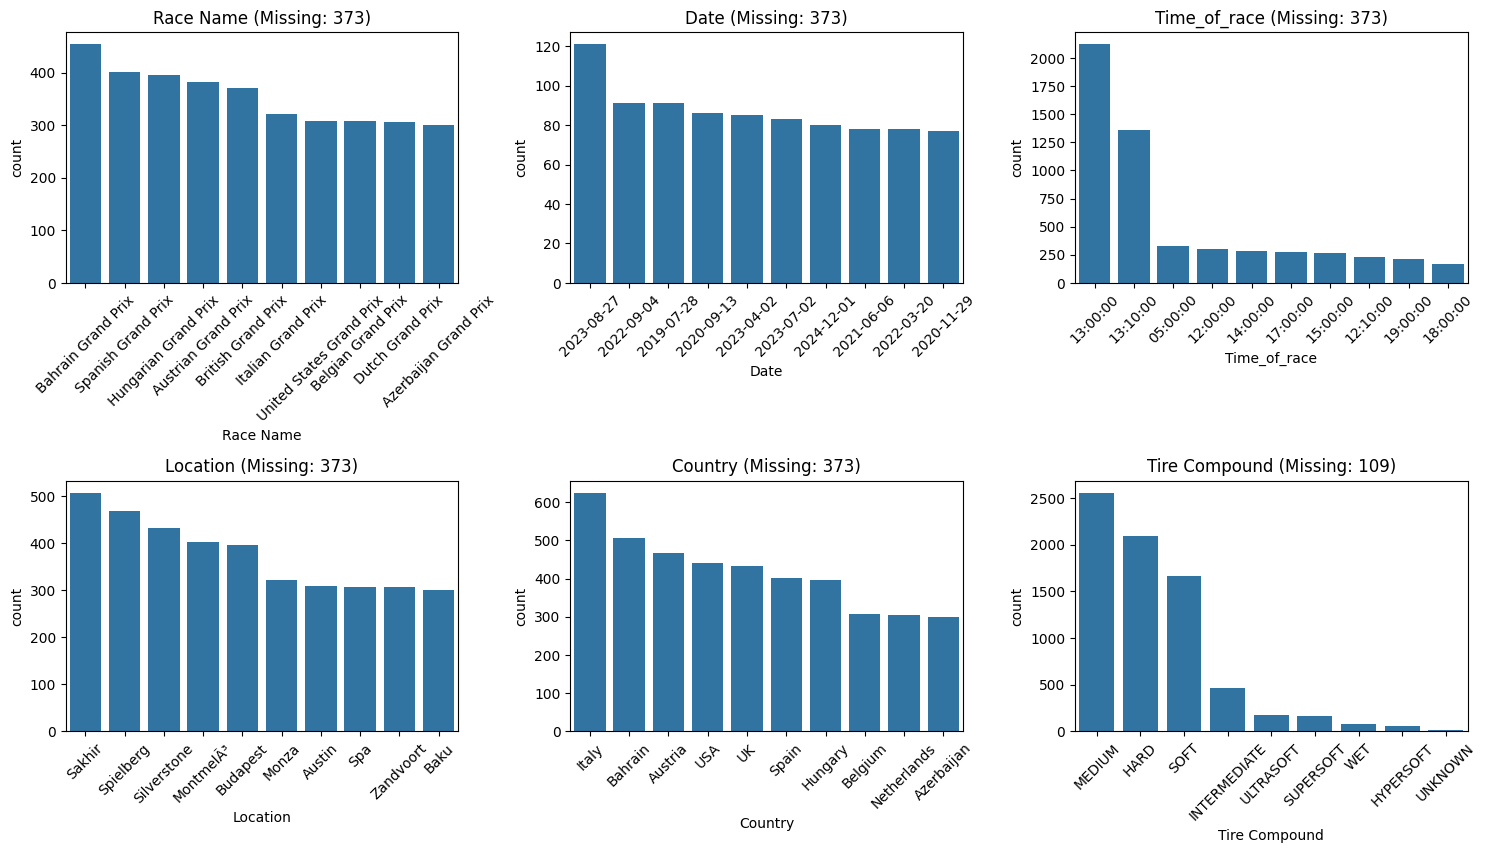

In [167]:
cat_cols = df.select_dtypes(include=['object'])

missing_cols = [col for col in cat_cols.columns if df[col].isnull().any()]

plt.figure(figsize=(15, 12))
for i, col in enumerate(missing_cols):
    plt.subplot(3, 3, i + 1)
    top_10 = df[col].value_counts().nlargest(10).sort_values(ascending=False).index
    sns.countplot(data=df[df[col].isin(top_10)], x=col, order=top_10)
    plt.title(f"{col} (Missing: {df[col].isnull().sum()})")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
df[df.isna().any(axis=1)].head(50)

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,Date,Time_of_race,Location,Country,Air_Temp_C,Track_Temp_C,Humidity_%,Wind_Speed_KMH,Lap Time Variation,Total Pit Stops,Tire Usage Aggression,Fast Lap Attempts,Position Changes,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Time
16,2018,1,Albert Park Grand Prix Circuit,Stoffel Vandoorne,McLaren,58,9,1,22.474000,Australian Grand Prix,2018-03-25,05:10:00,Melbourne,Australia,15.783333,22.283333,57.000000,23.800000,0.001950,0.142857,0.017241,44.081820,0.347826,6.686803,BEL,NaN,NaN,NaN,NaN
35,2018,1,Albert Park Grand Prix Circuit,Sergey Sirotkin,Williams,4,20,0,0.000000,Australian Grand Prix,2018-03-25,05:10:00,Melbourne,Australia,15.783333,22.283333,57.000000,23.800000,0.000000,0.000000,0.000000,0.000000,0.826087,0.000000,RUS,NaN,NaN,NaN,0.000
54,2018,2,Bahrain International Circuit,Stoffel Vandoorne,McLaren,56,8,2,25.106000,Bahrain Grand Prix,2018-04-08,15:10:00,Sakhir,Bahrain,22.054167,28.554167,36.833333,6.283333,0.002816,0.285714,0.035714,41.449820,0.304348,6.327324,BEL,NaN,NaN,NaN,NaN
73,2018,2,Bahrain International Circuit,Sergey Sirotkin,Williams,56,15,2,25.182500,Bahrain Grand Prix,2018-04-08,15:10:00,Sakhir,Bahrain,22.054167,28.554167,36.833333,6.283333,0.002841,0.285714,0.035714,41.373320,0.608696,6.346291,RUS,NaN,NaN,NaN,NaN
84,2018,2,Bahrain International Circuit,Daniel Ricciardo,Red Bull,1,20,0,0.000000,Bahrain Grand Prix,2018-04-08,15:10:00,Sakhir,Bahrain,22.054167,28.554167,36.833333,6.283333,0.000000,0.000000,0.000000,0.000000,0.826087,0.000000,RIC,NaN,NaN,NaN,0.000
114,2018,3,Shanghai International Circuit,Stoffel Vandoorne,McLaren,56,13,1,23.730000,Chinese Grand Prix,2018-04-15,06:10:00,Shanghai,China,12.608333,18.108333,67.833333,10.241667,0.002363,0.142857,0.017857,42.825820,0.521739,6.516041,BEL,NaN,NaN,NaN,NaN
117,2018,3,Shanghai International Circuit,Sergey Sirotkin,Williams,56,15,2,23.219500,Chinese Grand Prix,2018-04-15,06:10:00,Shanghai,China,12.608333,18.108333,67.833333,10.241667,0.002195,0.285714,0.035714,43.336320,0.608696,6.640547,RUS,NaN,NaN,NaN,NaN
151,2018,4,Baku City Circuit,Stoffel Vandoorne,McLaren,51,9,4,20.932000,Azerbaijan Grand Prix,2018-04-29,12:10:00,Baku,Azerbaijan,14.420833,19.920833,65.625000,35.908333,0.001442,0.571429,0.078431,45.623820,0.347826,7.037332,BEL,NaN,NaN,NaN,NaN
175,2018,4,Baku City Circuit,Sergey Sirotkin,Williams,0,20,0,0.000000,Azerbaijan Grand Prix,2018-04-29,12:10:00,Baku,Azerbaijan,14.420833,19.920833,65.625000,35.908333,0.000000,0.000000,0.000000,0.000000,0.826087,0.000000,RUS,NaN,NaN,NaN,0.000
205,2018,5,Circuit de Barcelona-Catalunya,Sergey Sirotkin,Williams,63,14,3,22.649333,Spanish Grand Prix,2018-05-13,13:10:00,MontmelÃ³,Spain,12.937500,18.437500,74.541667,9.516667,0.002007,0.428571,0.047619,43.906487,0.565217,6.759764,RUS,NaN,NaN,NaN,NaN
